# Imbalanced classes experiment, Part 3: Resampling
## May 1st, 2018
### Dr Jose M Albornoz

An experiment to determine good class imbalance compensation strategies. 

An artificially imbalanced dataset with two classes is generated, and the separation between classes in feature space is changed to explore the effect of conventional strategies used to tackle imbalanced classes.

## Conclusions:
1. **Imbalanced classes, clear separation in feature space**: Blagging results in an increase in recall and a drop in precision
2. **Imbalanced classes, no clear separation between classes, positive class has low variance**: Blagging results in an increase in recall and a drop in precsion
3. **Imbalanced classes, some degree of separation between classes, positive class has low variance**: Blagging results in an increase in recall and a drop in precsion
4. **Imbalanced classes, no clear separation between classes, both classes have similar variance**: Blagging increases recall, without changing precision

# Import necessary modules

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

import numpy as np
import seaborn as sbs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cross_validation import cross_val_score
from sklearn.utils import resample
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from scipy import stats

import seaborn as sns

RANDOM_STATE = 801

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# 1 Generate data

## 1.1 Number of samples in each class, class varaiance, and class separation

In [2]:
# Case 1: Imbalanced classes, good separation in feature space
# n_samples1 = 4000
# n_samples2 = 200

# sigma1 = 0.9
# sigma2 = 0.9

# offset_x1 = -1.5
# offset_x2 = 0

# Case 2: Imbalanced classes, no clear separation between classes, positive class has low variance
# n_samples1 = 4000
# n_samples2 = 200

# sigma1 = 0.9
# sigma2 = 0.1

# offset_x1 = 2.6
# offset_x2 = -.1

# Case 3: Imbalanced classes, some degree of separation between classes, positive class has low variance
# n_samples1 = 4000
# n_samples2 = 200

# sigma1 = 0.9
# sigma2 = 0.1

# offset_x1 = 1.6
# offset_x2 = -.1

# Case 4: Imbalanced classes, no clear separation between classes, both classes have similar variance
n_samples1 = 4000
n_samples2 = 200

sigma1 = 0.9
sigma2 = 0.9

offset_x1 = 2.6
offset_x2 = -.1

## 1.2 Class separation

In [3]:
# Case 1: Balanced classes, good separation in feature space
# offset_x1 = -1.5
# offset_x2 = 0

# offset_x1 = 2.5
# offset_x2 = 2.5
# offset_x1 = 1.6
# offset_x2 = 1.6
# offset_x1 = 0.5
# offset_x2 = 0.5
# offset_x1 = 2.6
# offset_x2 = -.1


## 1.3 Generate dataset

In [4]:
from sklearn.datasets import make_blobs
X1, y1 = make_blobs(n_samples=n_samples1, n_features=2, centers=1, cluster_std=sigma1, shuffle=True, random_state=0)
X2, y2 = make_blobs(n_samples=n_samples2, n_features=2, centers=1, cluster_std=sigma2, shuffle=True, random_state=1)

In [5]:
y2 = np.ones(n_samples2)

In [6]:
X2[:,0] = X2[:,0] + offset_x1

In [7]:
X2[:,1] = X2[:,1] + offset_x2

In [8]:
X = np.concatenate((X1, X2), axis=0)

In [9]:
y = np.concatenate((y1, y2))

In [10]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=0)

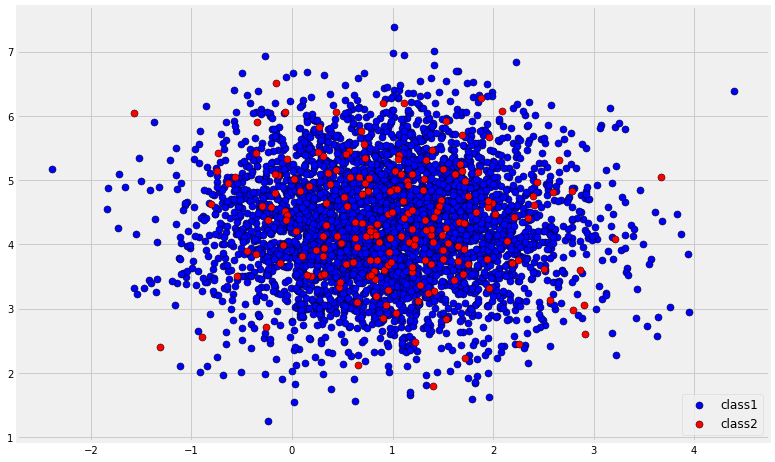

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X[y==0,0], X[y==0,1], c='blue', marker='o', edgecolor='black', s=50, label = 'class1')
plt.scatter(X[y==1,0], X[y==1,1], c='red', marker='o', edgecolor='black', s=50, label='class2')
plt.legend(loc='lower right', fontsize=12)

# 2 Training and tests sets

In [12]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=RANDOM_STATE)

# 3 Data normalisation

In [13]:
scl = StandardScaler()    

In [14]:
scl.fit(X_train_raw)
X_train = scl.transform(X_train_raw)

In [15]:
X_test = scl.transform(X_test_raw)

# 4 Model Definition

In [16]:
# clf1 = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1) 
clf1 = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced') 

In [17]:
# clf2 = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf2 = DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')

In [18]:
# clf3 = LogisticRegression(tol=0.1, random_state=RANDOM_STATE)
clf3 = LogisticRegression(tol=0.1, random_state=RANDOM_STATE, class_weight='balanced')

## 4.2 Model fitting

In [19]:
model1 = clf1.fit(X_train, y_train)

In [20]:
model2 = clf2.fit(X_train, y_train)

In [21]:
model3 = clf3.fit(X_train, y_train)

## 4.3 Performance on test set

In [22]:
y_pred1 = model1.predict(X_test)

In [23]:
y_pred2 = model2.predict(X_test)

In [24]:
y_pred3 = model3.predict(X_test)

In [25]:
# random forest
accuracy_score(y_test, y_pred1)

0.9466089466089466

In [26]:
# decision tree
accuracy_score(y_test, y_pred2)

0.9155844155844156

In [27]:
# logistic regression
accuracy_score(y_test, y_pred3)

0.5245310245310245

## 4.4 Confusion Matrix

In [28]:
np.bincount(y_train.astype(int))

array([2680,  134])

In [29]:
np.bincount(y_test.astype(int))

array([1320,   66])

In [30]:
confusion1 = confusion_matrix(y_test, y_pred1)
confusion1

array([[1312,    8],
       [  66,    0]])

Text(0.5,1,'Random Forest')

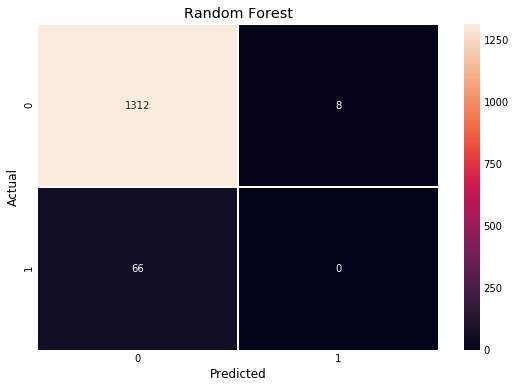

In [31]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion1, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Random Forest')

In [32]:
confusion2 = confusion_matrix(y_test, y_pred2)
confusion2

array([[1266,   54],
       [  63,    3]])

Text(0.5,1,'Decision tree')

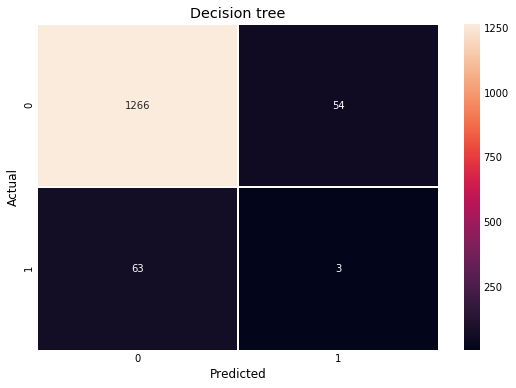

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion2, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Decision tree')

In [34]:
confusion3 = confusion_matrix(y_test, y_pred3)
confusion3

array([[696, 624],
       [ 35,  31]])

Text(0.5,1,'Logistic regression')

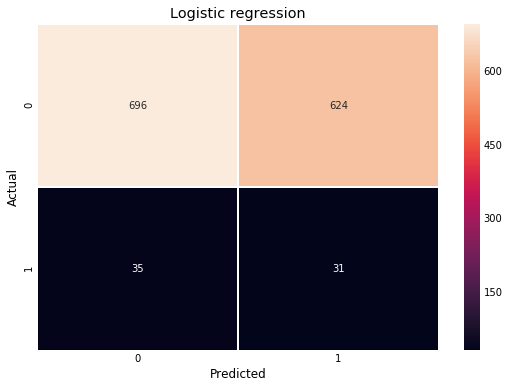

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion3, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Logistic regression')

## 4.5 Accuracy

In [36]:
# Overall, how often is the classifier correct?
# random forest
accuracy_score(y_test, y_pred1)

0.9466089466089466

In [37]:
# Overall, how often is the classifier correct?
# decision tree
accuracy_score(y_test, y_pred2)

0.9155844155844156

In [38]:
# Overall, how often is the classifier correct?
# logistic regression
accuracy_score(y_test, y_pred3)

0.5245310245310245

## 4.6 Classification error

In [39]:
# Overall, how often is the classifier incorrect?
# random forest
1 - accuracy_score(y_test, y_pred1)

0.053391053391053434

In [40]:
# Overall, how often is the classifier incorrect?
# decision tree
1 - accuracy_score(y_test, y_pred2)

0.08441558441558439

In [41]:
# Overall, how often is the classifier incorrect?
# logistic regression
1 - accuracy_score(y_test, y_pred3)

0.4754689754689755

## 4.7 Recall

In [42]:
# When the actual value is positive, how often is the prediction correct?
# random forest
recall_score(y_test, y_pred1)

0.0

In [43]:
# When the actual value is positive, how often is the prediction correct?
# decision tree
recall_score(y_test, y_pred2)

0.045454545454545456

In [44]:
# When the actual value is positive, how often is the prediction correct?
# logistic regression
recall_score(y_test, y_pred3)

0.4696969696969697

## 4.8 Precision

In [45]:
# When a positive value is predicted, how often is the prediction correct?
# random forest
precision_score(y_test, y_pred1)

0.0

In [46]:
# When a positive value is predicted, how often is the prediction correct?
# decision tree
precision_score(y_test, y_pred2)

0.05263157894736842

In [47]:
# When a positive value is predicted, how often is the prediction correct?
# logistic regression
precision_score(y_test, y_pred3)

0.04732824427480916

## 4.9 ROC curve

In [48]:
# Compute fpr, tpr, thresholds and roc auc
probs1 = clf1.predict_proba(X_test)
y_score1 = probs1[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

In [49]:
# Compute fpr, tpr, thresholds and roc auc
probs2 = clf2.predict_proba(X_test)
y_score2 = probs2[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

In [50]:
# Compute fpr, tpr, thresholds and roc auc
probs3 = clf3.predict_proba(X_test)
y_score3 = probs3[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3)
roc_auc3 = auc(fpr3, tpr3)

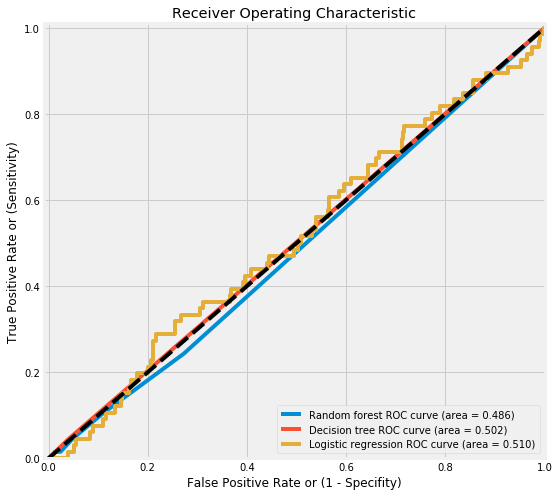

In [51]:
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='Random forest ROC curve (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision tree ROC curve (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Logistic regression ROC curve (area = %0.3f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

## 4.10 Precision-recall curve

In [52]:
precision1, recall1, _ = precision_recall_curve(y_test, y_score1)
precision2, recall2, _ = precision_recall_curve(y_test, y_score2)
precision3, recall3, _ = precision_recall_curve(y_test, y_score3)

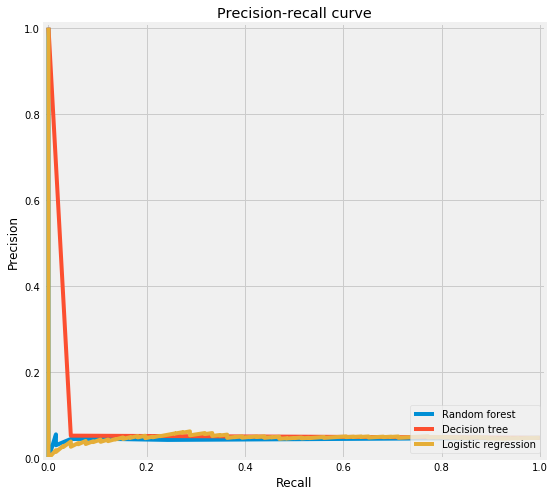

In [53]:
plt.figure(figsize=(8,8))
plt.plot(recall1, precision1, label='Random forest')
plt.plot(recall2, precision2, label='Decision tree')
plt.plot(recall3, precision3, label='Logistic regression')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")

# 5 Blagging

## 5.1 A function to take bootstrap samples from our training set

In [54]:
def bootstrap(X, y, nsamples):
    assert X.shape[0] == len(y)
    idx = np.random.choice(np.arange(X.shape[0]), nsamples, replace=True)
    return X[idx,:], y[idx]

## 5.2 A function to downsample the majority class

In [55]:
def downsampling(X, y):
    
    # identify majority and minority classes
    class_counts = np.bincount(y.astype(int))
    X_majority = X[y==0,:]
    X_minority = X[y==1,:]
    
    # downsample majority class in training set
    idx = np.random.choice(np.arange(X_majority.shape[0]), class_counts[1], replace=False)
    X_majority_downsampled = X_majority[idx,:]
    
    
    y_majority_downsampled = np.zeros(len(idx)).astype(int)
    y_minority_downsampled = np.ones(len(idx)).astype(int)
    X_downsampled = np.concatenate((X_majority_downsampled, X_minority), axis=0)
    y_downsampled = np.concatenate((y_majority_downsampled, y_minority_downsampled))
    
    # shuffle downsampled training set
    from sklearn.utils import shuffle
    X_downsampled, y_downsampled = shuffle(X_downsampled, y_downsampled)
    
    return X_downsampled, y_downsampled

## 5.3 Set ratio of bootstrap samples that will be taken from the training set, compute number of bootstrap samples

In [56]:
ratio_bootstrap = 1.0

In [57]:
bootstrap_samples = int(X_train.shape[0]*0.8)

In [58]:
bootstrap_samples

2251

## 5.4 Set number of estimators

In [59]:
n_estimators = 19

## 5.5 Bootstrapping, downsampling, and random estimation

In [60]:
for k in range(n_estimators):
    
    # bootstrap
    X_bstr, y_bstr = bootstrap(X_train, y_train, bootstrap_samples)
    
    # downsampling of majority class
    X_dwn, y_dwn = downsampling(X_bstr, y_bstr)
        
    # estimator prediction
    #model = clf1.fit(X_dwn, y_dwn)           # random forest
    model = clf2.fit(X_dwn, y_dwn)           # decision tree
    #model = clf3.fit(X_dwn, y_dwn)           # logistic fregression
    y_pred = model.predict(X_test)
        
    print('Class count for bootstrapped & downsampled y is: %d negatives, %d positives' % \
          (np.bincount(y_dwn)[0], np.bincount(y_dwn)[1]))
    print('Recall for iteration %d is %f' % (k, recall_score(y_test, y_pred)))
    print('Precision for iteration %d is %f' % (k, precision_score(y_test, y_pred)))
    print('')
    
    # concatenate output from each estimator
    if k == 0:
        y_ensemble = y_pred
    else:
        y_ensemble = np.vstack([y_ensemble, y_pred])
        
# perform majority voting 
y_blagged = np.zeros(y_ensemble.shape[1])
for n in range(len(y_test)):       
    y_blagged[n] = np.argmax(np.bincount(y_ensemble[:,n])) 
    
print('Class count for blagged y is: %d negatives, %d positives' % \
          (np.bincount(y_blagged.astype(int))[0], np.bincount(y_blagged.astype(int))[1]))    

Class count for bootstrapped & downsampled y is: 76 negatives, 76 positives
Recall for iteration 0 is 0.439394
Precision for iteration 0 is 0.050611

Class count for bootstrapped & downsampled y is: 97 negatives, 97 positives
Recall for iteration 1 is 0.454545
Precision for iteration 1 is 0.050420

Class count for bootstrapped & downsampled y is: 112 negatives, 112 positives
Recall for iteration 2 is 0.393939
Precision for iteration 2 is 0.048417

Class count for bootstrapped & downsampled y is: 117 negatives, 117 positives
Recall for iteration 3 is 0.500000
Precision for iteration 3 is 0.053922

Class count for bootstrapped & downsampled y is: 125 negatives, 125 positives
Recall for iteration 4 is 0.469697
Precision for iteration 4 is 0.056058

Class count for bootstrapped & downsampled y is: 110 negatives, 110 positives
Recall for iteration 5 is 0.545455
Precision for iteration 5 is 0.053571

Class count for bootstrapped & downsampled y is: 110 negatives, 110 positives
Recall for ite

# 6 Blagging performance

## 6.1 Confusion Matrix

In [61]:
np.bincount(y_train.astype(int))

array([2680,  134])

In [62]:
np.bincount(y_test.astype(int))

array([1320,   66])

In [63]:
confusion1 = confusion_matrix(y_test, y_blagged)
confusion1

array([[895, 425],
       [ 38,  28]])

Text(0.5,1,'Blagging')

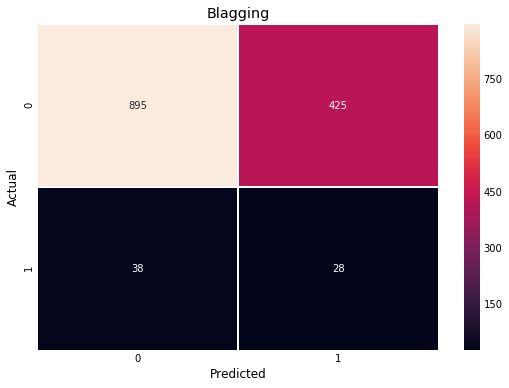

In [64]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion1, annot=True, fmt="d", linewidths=.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('Blagging')

## 6.2 Accuracy

In [65]:
# Overall, how often is the classifier correct?
# blagging
accuracy_score(y_test, y_blagged)

0.665945165945166

## 6.3 Classification error

In [66]:
# Overall, how often is the classifier incorrect?
# blagging
1 - accuracy_score(y_test, y_blagged)

0.33405483405483405

## 6.4 Recall

In [67]:
# When the actual value is positive, how often is the prediction correct?
# blagging
recall_score(y_test, y_blagged)

0.42424242424242425

## 6.5 Precision

In [68]:
# When a positive value is predicted, how often is the prediction correct?
# blagging
precision_score(y_test, y_blagged)

0.06181015452538632